In [80]:
# Importing necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [81]:
# Reading the CSV file 'HR_comma_sep.csv' into a pandas DataFrame
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [82]:
# Know the dimension of the data ; rows and columns
df.shape

(14999, 10)

In [83]:
# Printing the number of rows and columns in the DataFrame
print("The data has", df.shape[0], "rows and", df.shape[1], "columns")

The data has 14999 rows and 10 columns


In [84]:
# Counting the non-null values for each column in the DataFrame
df.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [85]:
# The type of each variable used in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [86]:
# Check if there are missing data in each variable
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [87]:
# Descriptive statistics of the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [88]:
def plot_correlation_heatmap(df):
    """
    Plot a heatmap of correlation coefficients for the given DataFrame.

    Parameters:
    - df (DataFrame) : The Dataset.
    """
    corr = df.corr()

    plt.figure(figsize=(12, 7))
    sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title('Heatmap (Correlation Coefficients)')
    plt.show()

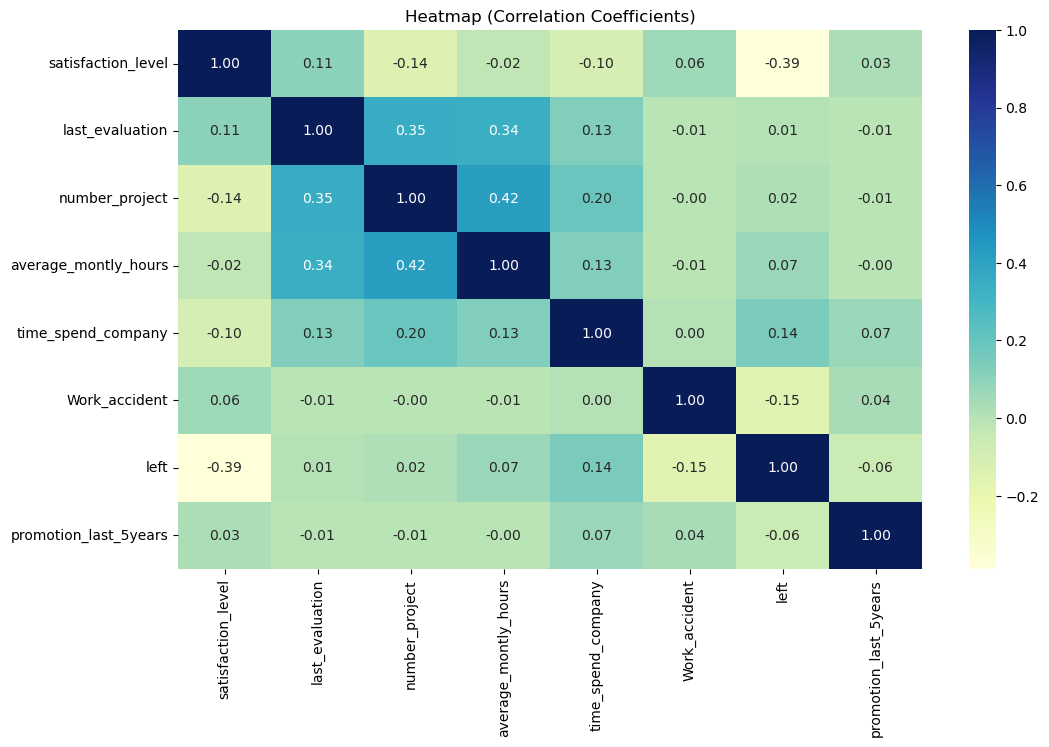

In [89]:
# Correlation of the dataset
plot_correlation_heatmap(df)

In [90]:
# Skewness of the variables in the dataset
data_skewness = df.skew()
data_skewness

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

In [91]:
# Kurtosis of the variables in the dataset
data_kurtosis = df.kurt()
data_kurtosis

satisfaction_level       -0.670859
last_evaluation          -1.239040
number_project           -0.495478
average_montly_hours     -1.134982
time_spend_company        4.773211
Work_accident             2.085320
left                     -0.487060
promotion_last_5years    42.054957
dtype: float64

In [92]:
# Counting the occurrences of unique values in the 'left' (Variable) column of the data
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [93]:
# Mean of the left(target) variable
df.left.mean()

0.2380825388359224

In [94]:
# Generating the X(Features) and Y(Target) variable
features = df[['satisfaction_level','last_evaluation','number_project', 'average_montly_hours','time_spend_company',
     'number_project','Work_accident','promotion_last_5years', 'salary']]
target = df[['left']]

In [95]:
#The minimum and maximum satisaction level of the employees
df.satisfaction_level.min(), df.satisfaction_level.max()

(0.09, 1.0)

In [96]:
#Status of employees with satisfaction level of 1.0
df.loc[df.satisfaction_level == 1.0, 'left'].value_counts()

0    111
Name: left, dtype: int64

In [97]:
#Status of employees with satisfaction level of 0.9
df.loc[df.satisfaction_level == 0.9, 'left'].value_counts()

0    168
1     52
Name: left, dtype: int64

In [147]:
# Generating a function to plot a pie chart of satisfaction level
def plot_satisfaction_pie_chart(df, column='left', limit=0.5, larger_than=True, title = None):
    """
    Plot a pie chart based on satisfaction level, that is filtered by a column in the dataset and aslo a limit.

    Parameters:
    - df : The Dataset.
    - column (str): The column to filter the data by ('left' is the column being used).
    - limit (float): The limit value for separting data (0.5 is used here).
    - larger_than (bool): Whether to filter by satisfaction level greater than or equal to the limit (default is True).
    - title (bool): Title for the piechart
    """
    if larger_than:
        df = df[df['satisfaction_level'] > limit]
    else:
        df = df[df['satisfaction_level'] <= limit]

    df[column].value_counts(normalize=True).sort_index().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'],
                                                             labels = None)
    plt.legend(["Not Left","Left"])
    plt.title(title)
    plt.axis('equal')


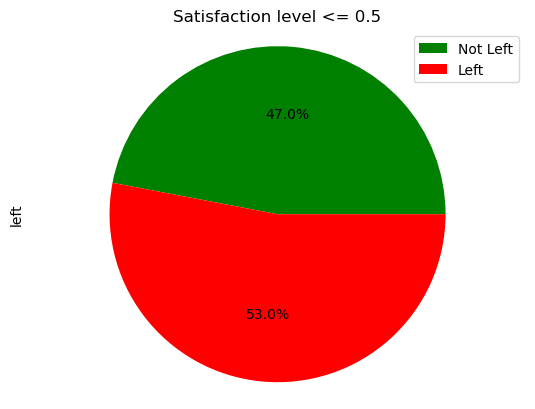

In [148]:
# Piechart showing the status of employees with satisfaction level less than or equal to 0.5 and greater than 0.5 in percentage 
plot_satisfaction_pie_chart(df, column='left', limit=0.5, larger_than=False,
                            title = "Satisfaction level <= 0.5")

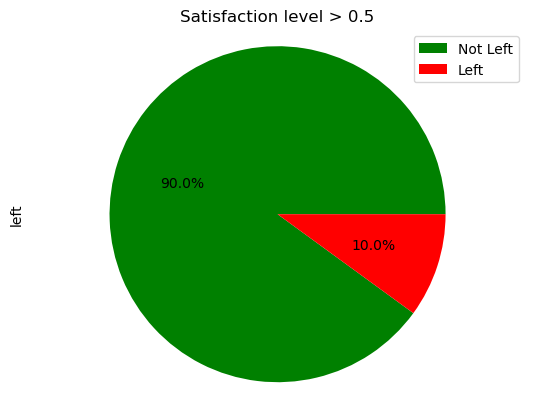

In [149]:
# Piechart showing the status of employees with satisfaction level more than 0.5 in percentage 
plot_satisfaction_pie_chart(df, column='left', limit=0.5, larger_than=True,
                            title = "Satisfaction level > 0.5")

In [101]:
def scatter_plot(df):
    """
    Plot a scatter plot based on 'satisfaction_level' and 'average_montly_hours' with points differentiated by 'left'.

    Parameters:
    - df : Dataset.
    """
    plt.scatter(df[df['left'] == 0]['satisfaction_level'], df[df['left'] == 0]['average_montly_hours'], label='Not Left', alpha=0.5)
    plt.scatter(df[df['left'] == 1]['satisfaction_level'], df[df['left'] == 1]['average_montly_hours'], label='Left', alpha=0.5)

    plt.title('Scatter Plot based on satisfaction_level and average_montly_hours with points differentiated by left')
    plt.xlabel('Satisfaction Level')
    plt.ylabel('Average Monthly Hours')
    plt.legend()

    plt.show()

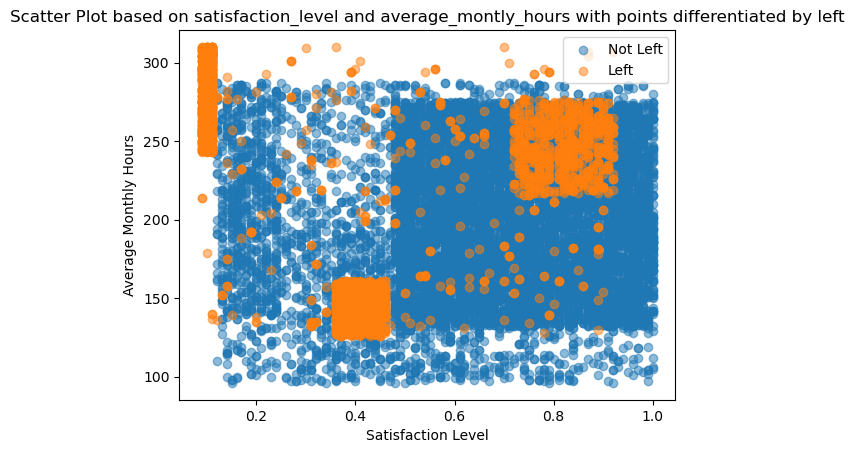

In [102]:
scatter_plot(df)
# There is no strong relationship between the satisfaction level,
# average monthly hours and the likelihood of leaving.

In [103]:
#Minimum and maxamim evaluation
df.last_evaluation.min(), df.last_evaluation.max()

(0.36, 1.0)

In [104]:
#Status of employees with last evaluation of 1.0
df.loc[df.last_evaluation == 1.0, 'left'].value_counts()

1    167
0    116
Name: left, dtype: int64

In [105]:
#Status of employees with last evaluation of 0.36
df.loc[df.last_evaluation == 0.36, 'left'].value_counts()

0    22
Name: left, dtype: int64

In [106]:
df.last_evaluation.median()

0.72

In [107]:
#Status of employees with last evaluation less than or eqaull to 0.72
df.loc[df.last_evaluation <= 0.72, 'left'].value_counts()

0    5923
1    1681
Name: left, dtype: int64

In [108]:
#Status of employees with last evaluation greater than 0.72
df.loc[df.last_evaluation > 0.72, 'left'].value_counts()

0    5505
1    1890
Name: left, dtype: int64

In [109]:
# Generating a function to plot a bar chart
def plot_last_evaluation_bar_chart(df, column='left', limit=0.72, larger_than=True, title = None):
    """
    Plot a bar chart based on last_evalation, that is filtered by a column in the dataset and aslo a limit.

    Parameters:
    - df : The Dataset.
    - column (str): The column to filter the data by ('left' is the column being used).
    - limit (float): The limit value for separting data (0.72 is used here).
    - larger_than (bool): Whether to filter by last_evaluation greater than or equal to the limit (default is True).
    - title (bool): Title for the barchart
    """
    if larger_than:
        df = df[df['last_evaluation'] > limit]
    else:
        df = df[df['last_evaluation'] <= limit]
        
    # Mapping the x-axis ticks to 'Not Left' (0) and 'Left' (1)
    x_ticks_labels = {0: 'Not Left', 1: 'Left'}

    df[column].value_counts().sort_index().rename(index=x_ticks_labels).plot(kind='bar', grid = True)
    plt.title(title)
    plt.xlabel('Left')
    plt.ylabel('%age')

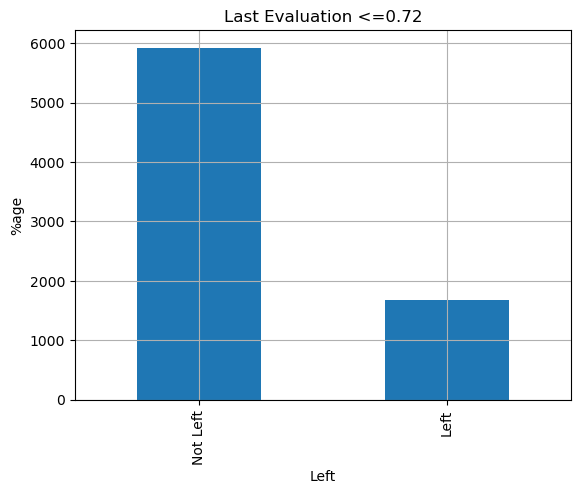

In [110]:
#Barchart showing the status of employees with last_evaluation less than and greater than or equal to 0.72 in percentage
plot_last_evaluation_bar_chart(df, column='left', limit=0.72, larger_than=False,
                               title = "Last Evaluation <=0.72")

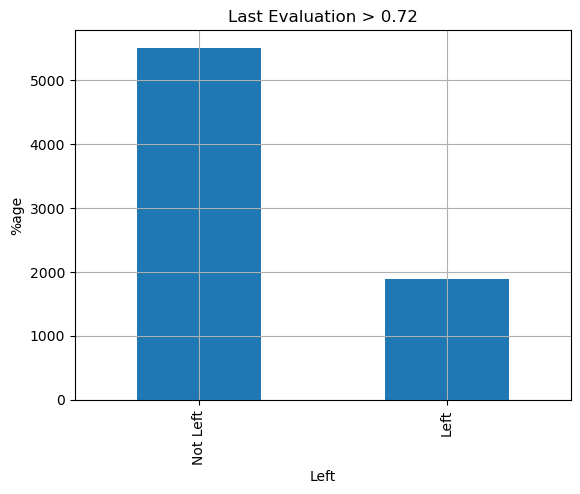

In [111]:
#Barchart showing the status of employees with last_evaluation greater than or equal to 0.72 in percentage
plot_last_evaluation_bar_chart(df, column='left', limit=0.72, larger_than=True,
                               title = "Last Evaluation > 0.72")

In [112]:
#The minimum and maximum number of projects each employee has carried out
df.number_project.min(), df.number_project.max()
print('The minimum number of project done by an employee is',df.number_project.min(), 
     "and the maximum number of projects is", df.number_project.max())

The minimum number of project done by an employee is 2 and the maximum number of projects is 7


In [113]:
#Status of employees with two(2) projects
df.loc[df.number_project ==2, 'left'].value_counts()

1    1567
0     821
Name: left, dtype: int64

In [114]:
#Status of employees with seven(7) projects
df.loc[df.number_project ==7, 'left'].value_counts()

1    256
Name: left, dtype: int64

In [115]:
#Status of employees with less than or equal to four(4) projects
df.loc[df.number_project <=4, 'left'].value_counts()

0    8760
1    2048
Name: left, dtype: int64

In [116]:
#Status of employees with more than or equal to four(4) projects
df.loc[df.number_project > 4, 'left'].value_counts()

0    2668
1    1523
Name: left, dtype: int64

In [117]:
# Generating a function to plot a bar chart for the amount of projects.
def projects_bar_chart(df, column='left', limit=4, larger_than=True, title = None):
    """
    Plot a bar chart based on number of projects, that is filtered by a column in the dataset and aslo a limit.

    Parameters:
    - df : The Dataset.
    - column (str): The column to filter the data by ('left' is the column being used).
    - limit (float): The limit value for separting data (0.72 is used here).
    - larger_than (bool): Whether to filter by last_evaluation greater than or equal to the limit (default is True).
    - title (bool): Title for the barchart
    """
    if larger_than:
        df = df[df['number_project'] > limit]
    else:
        df = df[df['number_project'] <= limit]
        
    # Mapping the x-axis ticks to 'Not Left' (0) and 'Left' (1)
    x_ticks_labels = {0: 'Not Left', 1: 'Left'}
    
    df[column].value_counts(normalize=True).sort_index().rename(index=x_ticks_labels).plot(kind='bar', grid = True)
    
    plt.title(title)
    plt.xlabel('Left')
    plt.ylabel('%age')

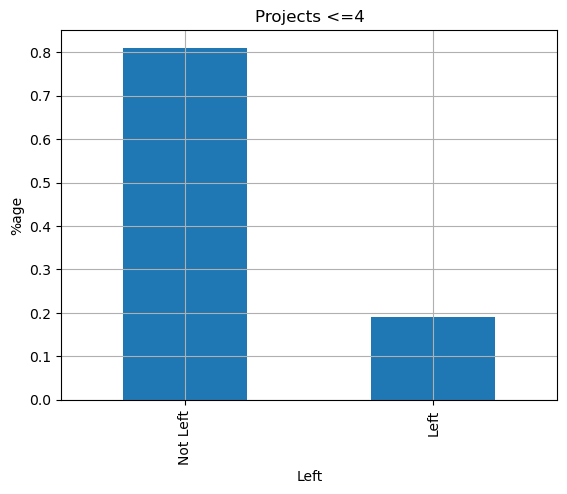

In [118]:
#Barchart showing status of employees with less than or equal to four(4) projects 
projects_bar_chart(df, column='left', limit=4, larger_than=False,
                               title = "Projects <=4")

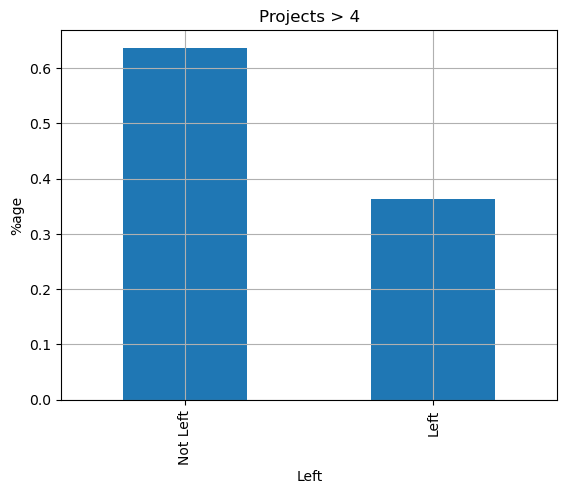

In [119]:
#Barcharts showing status of employees with more than four(4) projects
projects_bar_chart(df, column='left', limit=4, larger_than=True,
                               title = "Projects > 4")

In [120]:
#The minimun and maximum average monthly hours of each employee
df.average_montly_hours.min(), df.average_montly_hours.max()
print("The minimum average monthly hours done by am employee is",df.average_montly_hours.min(),
     "while the maximum average monthly hours is", df.average_montly_hours.max())

The minimum average monthly hours done by am employee is 96 while the maximum average monthly hours is 310


In [121]:
#The mean of avarage monthly hours
df.average_montly_hours.mean()

201.0503366891126

In [122]:
#Employee status distribution for those working for 310 hours
df.loc[df.average_montly_hours == 310, 'left'].value_counts()

1    18
Name: left, dtype: int64

In [123]:
#Employee status distribution for those working for 96 hours
df.loc[df.average_montly_hours == 96, 'left'].value_counts()

0    6
Name: left, dtype: int64

In [124]:
#Employee status distribution for those working for less than or equal to 160 hours
df.loc[df.average_montly_hours <= 160, 'left'].value_counts()

0    2766
1    1574
Name: left, dtype: int64

In [125]:
#Employee status distribution for those working for more than 160 hours
df.loc[df.average_montly_hours > 160, 'left'].value_counts()

0    8662
1    1997
Name: left, dtype: int64

In [126]:
# Generating a function to plot a bar chart
def projects_bar_chart(df, column='left', limit=4, larger_than=True, title = None):
    """
    Plot a bar chart based on number of projects, that is filtered by a column in the dataset and aslo a limit.

    Parameters:
    - df : The Dataset.
    - column (str): The column to filter the data by ('left' is the column being used).
    - limit (float): The limit value for separting data (0.72 is used here).
    - larger_than (bool): Whether to filter by last_evaluation greater than or equal to the limit (default is True).
    - title (bool): Title for the barchart, (if no title, it returns None)
    """
    if larger_than:
        df = df[df['number_project'] > limit]
    else:
        df = df[df['number_project'] <= limit]
        
    # Mapping the x-axis ticks to 'Not Left' (0) and 'Left' (1)
    x_ticks_labels = {0: 'Not Left', 1: 'Left'}

    df[column].value_counts(normalize=True).sort_index().rename(index=x_ticks_labels).plot(kind='bar', grid = True)
    plt.title(title)
    plt.xlabel('Left')
    plt.ylabel('%age')

In [127]:
# Distribution of employees based on the number of years spent in the company
df.time_spend_company.value_counts().sort_index()

2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

In [128]:
#Status of number of employees who spent 10 years
df.loc[df.time_spend_company == 10, 'left'].value_counts()

0    214
Name: left, dtype: int64

In [129]:
#Status of number of employees who spent two(2) years
df.loc[df.time_spend_company ==2, 'left'].value_counts()

0    3191
1      53
Name: left, dtype: int64

In [130]:
# Generating a function to plot a bar chart
def time_spent_bar_chart(df, column='left', limit=5, larger_than=True,
                         title =None):
    """
    Plot a bar chart based on number of projects, that is filtered by a column in the dataset and aslo a limit.

    Parameters:
    - df : The Dataset.
    - column (str): The column to filter the data by ('left' is the column being used).
    - limit (float): The limit value for separting data (5 is used here).
    - larger_than (bool): Whether to filter by last_evaluation greater than or equal to the limit (default is True).
    - title (bool): Title for the barchart, (if no title, it returns None)
    """
    if larger_than:
        df = df[df['time_spend_company'] > limit]
    else:
        df = df[df['time_spend_company'] <= limit]
    # Mapping the x-axis ticks to 'Not Left' (0) and 'Left' (1)
    x_ticks_labels = {0: 'Not Left', 1: 'Left'}

    df[column].value_counts().sort_index().rename(index=x_ticks_labels).plot(kind='bar', grid = True)
    plt.title(title)
    plt.xlabel('Left')
    plt.ylabel('%age')

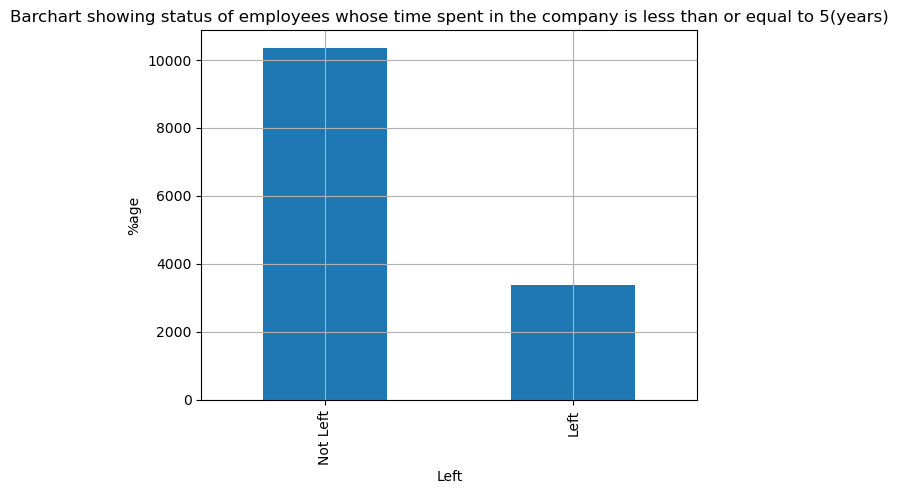

In [131]:
# Barchart showing status of employees whose time spent in the company is less than or equal to 5(years)
time_spent_bar_chart(df, column='left', limit=5, larger_than=False,
title =  "Barchart showing status of employees whose time spent in the company is less than or equal to 5(years)")

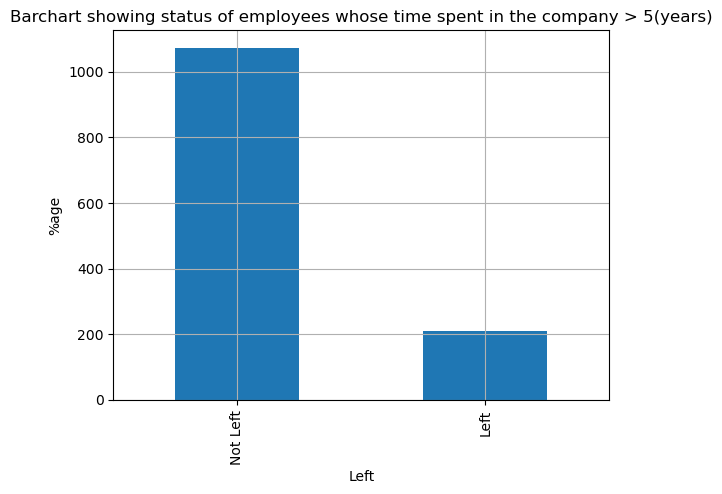

In [132]:
# Barchart showing status of employees whose time spent in the company is more than 5(years)
time_spent_bar_chart(df, column='left', limit=5, larger_than=True,title="Barchart showing status of employees whose time spent in the company > 5(years)")

In [133]:
#Status of employees with work accident
df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [134]:
#Status of employees with no work accident
df.loc[df.Work_accident == 0, 'left'].value_counts()

0    9428
1    3402
Name: left, dtype: int64

In [135]:
#Status of employees with work accident
df.loc[df.Work_accident == 1, 'left'].value_counts()

0    2000
1     169
Name: left, dtype: int64

In [136]:
#Status of employees without and with promotion last five (5) years
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [137]:
#Status of employees with no promotion last five(5) years
df.loc[df.promotion_last_5years == 0, 'left'].value_counts()

0    11128
1     3552
Name: left, dtype: int64

In [138]:
#Status of employees with promotion last five(5) years
df.loc[df.promotion_last_5years == 1, 'left'].value_counts()

0    300
1     19
Name: left, dtype: int64

In [139]:
#Departments and number of employees
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [140]:
#Grouping by department and salary, the status of employees
df.groupby(['Department', 'salary'])[ 'left'].value_counts().head()

Department  salary  left
IT          high    0        79
                    1         4
            low     0       437
                    1       172
            medium  0       438
Name: left, dtype: int64

In [141]:
#Status of employees with low salary
df.loc[df.salary == 'low', 'left'].value_counts()

0    5144
1    2172
Name: left, dtype: int64

In [142]:
# Total amount of employees with low salary
df.loc[df.salary == 'low', 'left'].value_counts().sum()

7316

In [143]:
#Status of employees with medium salary
df.loc[df.salary == 'medium', 'left'].value_counts()

0    5129
1    1317
Name: left, dtype: int64

In [144]:
# Total amount of employees with medium salary
df.loc[df.salary == 'medium', 'left'].value_counts().sum()

6446

In [145]:
#Status of employees with high salary
df.loc[df.salary == 'high', 'left'].value_counts()

0    1155
1      82
Name: left, dtype: int64

In [146]:
# Total amount of employees with high salary
df.loc[df.salary == 'high', 'left'].value_counts().sum()

1237